In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
torch.cuda.set_device(2)

# data 2015-2017

In [4]:
df=pd.read_csv('/data2/datasets/medstar/breast_pathology/lookup 2015-2017.csv')

In [5]:
df.head()

,Path,Notes,File name
0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt
1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt
2,Malignant,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt
3,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt
4,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt


In [6]:
df['Path'].value_counts()

Benign       1263
Malignant     426
EXCLUDE        10
0               4
Name: Path, dtype: int64

In [11]:
df['Notes'].value_counts()

HRL    148
Name: Notes, dtype: int64

In [13]:
df['Notes'].unique()

array([nan, 'HRL'], dtype=object)

In [14]:
def func(x):
    text=open(os.path.join(path,x))
    return text.read()

In [15]:
path='/data2/datasets/medstar/breast_pathology/pathology_anonymized_report'

In [16]:
df.columns

Index(['Path', 'Notes', 'File name'], dtype='object')

In [17]:
df['text']=df['File name'].apply(func)

In [18]:
df.head()

,Path,Notes,File name,text
0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...
1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...
2,Malignant,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...
3,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,..."
4,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...


## drop EXCLUDE and O

In [19]:
df=df[(df['Path']=='Benign') |(df['Path']=='Malignant')]

In [20]:
df['Path'].value_counts()

Benign       1263
Malignant     426
Name: Path, dtype: int64

## drop duplicates

In [34]:
df.duplicated('File name').sum()

268

In [35]:
df.drop_duplicates('File name',inplace=True)

# data 2018

In [21]:
data=pd.read_csv('/data2/datasets/medstar/breast_pathology/lookup.csv')

In [22]:
data.head()

,File Name,Path,Notes
0,522a68932d261e3d9c07db8f93073d05.txt,Benign,NaN
1,1554f75ecbb52e6ade28b3158e47e4a5.txt,Benign,NaN
2,df2c9febb31db2795e65a057507e3c9a.txt,Benign,NaN
3,0d41aa9f8d070227f0ee83f73b4480c1.txt,Benign,NaN
4,df610ecbbffe4c0fad802718425ee7b3.txt,Benign,NaN


In [23]:
data.describe()

,File Name,Path,Notes
count,2658,2658,197
unique,2207,3,1
top,6310296a6e942e107bbd0da5bf082dbe.txt,Benign,HRL
freq,8,1924,197


In [24]:
data['Path'].value_counts()

Benign       1924
Malignant     729
benign          5
Name: Path, dtype: int64

In [25]:
data['Path'].unique()

array(['Benign', 'Malignant', 'benign'], dtype=object)

In [26]:
data['Path'].replace(regex='benign', value='Benign', inplace=True)

In [27]:
data['Path'].value_counts()

Benign       1929
Malignant     729
Name: Path, dtype: int64

In [28]:
data['Notes'].value_counts()

HRL    197
Name: Notes, dtype: int64

In [29]:
data['Notes'].unique()

array([nan, 'HRL'], dtype=object)

In [30]:
data['File Name '].isna().sum()

0

In [31]:
data['text']=data['File Name '].apply(func)

In [32]:
data.head()

,File Name,Path,Notes,text
0,522a68932d261e3d9c07db8f93073d05.txt,Benign,NaN,"Final Diagnosis\n\nBREAST, LEFT, BIOPSY;\n -\t..."
1,1554f75ecbb52e6ade28b3158e47e4a5.txt,Benign,NaN,Source of Specimen\nA\tBRST BX EXC MRG\tLEFT B...
2,df2c9febb31db2795e65a057507e3c9a.txt,Benign,NaN,Source of Specimen\nA\tRIGHT BREAST 9 GAUGE\n\...
3,0d41aa9f8d070227f0ee83f73b4480c1.txt,Benign,NaN,Source of Specimen\nA\tLT BREAST BX 9 GAUGE\n...
4,df610ecbbffe4c0fad802718425ee7b3.txt,Benign,NaN,Source of Specimen\nA\t9 GAUGE RT BREAST STERE...


In [36]:
data.duplicated('File Name ').sum()

451

In [37]:
data['File Name '].value_counts()

6310296a6e942e107bbd0da5bf082dbe.txt    8
e15afda0f6a3ee205f908ff6816d4469.txt    5
e001bc7376389d312b44c0776d7bc21c.txt    5
48b8dcaf4b8b26b78322f65881879972.txt    4
513c7d94a3e5994943ac015b40142590.txt    4
                                       ..
bb5d11af98ca596a364ea239225afa53.txt    1
3cb85990fc8c3729bd5a742e475d86ee.txt    1
fb16405043415c8890b662e4fa25db97.txt    1
dac4809cdb7ddb4a75292f49304cf4c3.txt    1
d441512892ab5862e801e4fa6e3fad45.txt    1
Name: File Name , Length: 2207, dtype: int64

In [45]:
data[data['File Name ']=='6310296a6e942e107bbd0da5bf082dbe.txt']

,File Name,Path,Notes,text
1405,6310296a6e942e107bbd0da5bf082dbe.txt,Malignant,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1406,6310296a6e942e107bbd0da5bf082dbe.txt,Malignant,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1408,6310296a6e942e107bbd0da5bf082dbe.txt,Malignant,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1409,6310296a6e942e107bbd0da5bf082dbe.txt,Malignant,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1411,6310296a6e942e107bbd0da5bf082dbe.txt,Malignant,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1412,6310296a6e942e107bbd0da5bf082dbe.txt,Malignant,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1422,6310296a6e942e107bbd0da5bf082dbe.txt,Benign,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."
1423,6310296a6e942e107bbd0da5bf082dbe.txt,Benign,NaN,"Final Diagnosis\nRight breast (7 o'clock), cor..."


In [38]:
data.drop_duplicates('File Name ',inplace=True)

In [48]:
data.duplicated().sum()

0

# Concatenate the two data

In [39]:
df.columns

Index(['Path', 'Notes', 'File name', 'text'], dtype='object')

In [40]:
data.columns

Index(['File Name ', 'Path', 'Notes', 'text'], dtype='object')

In [41]:
data.rename(columns={'File Name ':'File name'}, inplace=True)

In [42]:
data.columns

Index(['File name', 'Path', 'Notes', 'text'], dtype='object')

In [45]:
result = pd.concat([df,data])
result.head()

,Path,Notes,File name,text
0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...
1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...
3,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,..."
4,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...
5,Benign,NaN,7c6a5ffcad9f0b91b4189c2a504c4a42.txt,Source of Specimen\nA\tRight breast cores with...


In [46]:
data['Path'].value_counts()

Benign       1624
Malignant     583
Name: Path, dtype: int64

In [47]:
df['Path'].value_counts()

Benign       1096
Malignant     325
Name: Path, dtype: int64

In [48]:
result['Path'].value_counts()

Benign       2720
Malignant     908
Name: Path, dtype: int64

In [49]:
1624+1096

2720

In [50]:
583+325

908

In [51]:
result.to_csv('data_2015_2018.csv')

# Preparing Pathology data

In [52]:
df3=pd.DataFrame(result['text'])

In [53]:
df3.head()

,text
0,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...
1,Source of Specimen\nA\tRight breast cores\nB\t...
3,"Addendum\nAfter discussion with a radiologist,..."
4,Source of Specimen\nA\tRight breast core bx\nC...
5,Source of Specimen\nA\tRight breast cores with...


# Language Model

In [54]:
bs = 64  
mypath=Path('/data2/itahir/MedstarProject')
data_lm = (TextList.from_df(df3, path, cols='text')
                .split_by_rand_pct(0.1)
                .label_for_lm()
                .databunch(bs=bs))

In [55]:
data_lm.save('/data2/itahir/MedstarProject/p_all_data_lm2.pkl')

In [15]:
bs = 64  
mypath=Path('/data2/itahir/MedstarProject')

In [5]:
data_lm = load_data(mypath, 'p_all_data_lm2.pkl', bs=bs)

/data2/itahir/anaconda3/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [58]:
data_lm.show_batch()

idx,text
0,"of yellow cyst fluid is received in xxmaj cytology , correctly labeled with the patient 's name and date of birth , which correspond to the identifiers submitted on the requisition form . \n xxmaj materials xxmaj prepared and xxmaj examined \n xxmaj diff - xxmaj quik stained direct smear / s : 1 \n xxmaj papanicolaou - stained thinprep smear / s ( prepared from cytolyt"
1,"assay is xxup fda cleared for in vitro diagnostic use for the determination of xxup her2 gene overexpression in paraffin - embedded , formalin - fixed tissue . xxmaj unless otherwise indicated , only the invasive component is considered for scoring . xxup her2 assay has not been validated on decalcified tissues . xxmaj results should be interpreted with caution given the likelihood of false negativity on decalcified specimens ."
2,") xxmaj right breast with calcifications , stereotactic needle core biopsy : \n - \t xxmaj multiple foci of atypical lobular hyperplasia with focal lobular carcinoma in situ with pagetoid spread to adjacent ducts . \n \n - \t xxmaj polarization reveals occasional foci of birefringent crystals consistent with calcium oxalate . \n \n - \t xxmaj no evidence of invasive malignancy . \n \n ("
3,specimen \n a \t xxmaj right breast cores \n xxmaj clinical xxmaj information \n xxmaj new palpable mass in the right breast at 4:00 . xxmaj procedure : xxmaj ultrasound biopsy right breast . \n \n xxmaj gross xxmaj description \n xxmaj the specimen is received in a single container . xxmaj this container is correctly labeled with the patient 's name and date of
4,"xxunk with xxunk . j xxmaj clin xxmaj oncol . xxunk - xxunk . \n 2 . \t cobas ® xxup kras xxmaj mutation xxmaj test [ package insert]. xxmaj xxunk , xxup in : xxmaj roche xxmaj diagnostics ; xxunk / 2013 . \n _ \n \n xxmaj addendum \n xxmaj molecular xxmaj diagnostics xxmaj laboratory xxmaj report \n xxup egfr xxmaj mutation xxmaj"


In [59]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


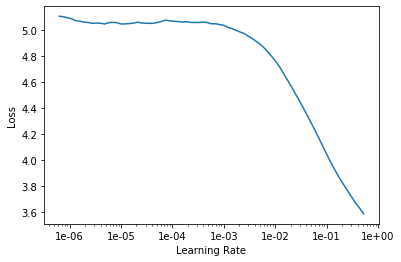

In [61]:
learn.recorder.plot(skip_end=15)

In [62]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))  

epoch,train_loss,valid_loss,accuracy,time
0,0.697944,0.615323,0.858678,00:25


In [63]:
learn.save('p_all_fit2_head')

In [64]:
learn.load('p_all_fit2_head');

In [65]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-04
Min loss divided by 10: 6.31E-08


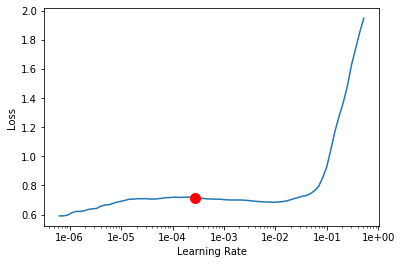

In [66]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [67]:
learn.fit_one_cycle(4, slice(1e-6,1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.629968,0.554933,0.868817,00:32
1,0.511437,0.488639,0.883027,00:32
2,0.458290,0.455702,0.889996,00:32
3,0.451374,0.448727,0.891665,00:33


In [68]:
learn.save('p_all_fine_2tuned')

In [69]:
learn.load('p_all_fine_2tuned');

In [70]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


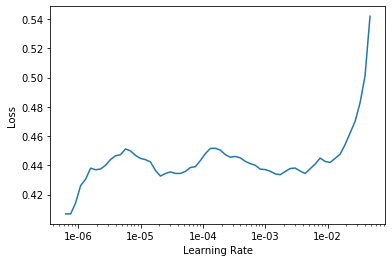

In [71]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [72]:
learn.fit_one_cycle(4, 1e-5, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.440955,0.448700,0.891607,00:33
1,0.424781,0.447233,0.891911,00:33
2,0.417419,0.446589,0.892040,00:33
3,0.423298,0.446401,0.892165,00:34


In [73]:
learn.save('p_all_fine_2tuned_10')

In [63]:
learn.load('p_all_fine_2tuned_10');

In [74]:
learn.save_encoder('p_all_fine_tuned_enc_6')

# Data Split

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [7]:
#data.to_csv('p_data')

In [8]:
data=pd.read_csv('data_2015_2018.csv')

In [9]:
data.head()

,Unnamed: 0,Path,Notes,File name,text
0,0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...
1,1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...
2,3,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,..."
3,4,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...
4,5,Benign,NaN,7c6a5ffcad9f0b91b4189c2a504c4a42.txt,Source of Specimen\nA\tRight breast cores with...


In [10]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [11]:
data.columns

Index(['Path', 'Notes', 'File name', 'text'], dtype='object')

In [12]:
data.head()

,Path,Notes,File name,text
0,Benign,NaN,9ae0ad5a60c745805466caa5dd4e29a7.txt,Source of Specimen\nA\tLeft Breast Cyst (9 o'c...
1,Benign,NaN,ed607e409c73353f0d0ab94d5cca1b6e.txt,Source of Specimen\nA\tRight breast cores\nB\t...
2,Benign,NaN,fbf2e75883507455721fa410cefe8213.txt,"Addendum\nAfter discussion with a radiologist,..."
3,Benign,NaN,6aaec96d9a3c31aa9711bc453dbaea73.txt,Source of Specimen\nA\tRight breast core bx\nC...
4,Benign,NaN,7c6a5ffcad9f0b91b4189c2a504c4a42.txt,Source of Specimen\nA\tRight breast cores with...


In [13]:
data['Path'].value_counts()

Benign       2720
Malignant     908
Name: Path, dtype: int64

In [14]:
for train_index, test_index in split.split(data,data['Path']):
    train=data.loc[train_index]
    test=data.loc[test_index]

# Classifier

In [84]:
data_clas = TextDataBunch.from_df(path=mypath, train_df=train, valid_df=test, text_cols=['text'], label_cols='Path', 
                                  vocab=data_lm.vocab)

In [85]:
data_clas.save('p_all_data_clas.pkl')

In [16]:
data_clas = load_data(mypath, 'p_all_data_clas.pkl', bs=bs)

/data2/itahir/anaconda3/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [17]:
data_clas.show_batch()

text,target
xxbos xxmaj addendum \n xxmaj molecular xxmaj diagnostics xxmaj laboratory xxmaj report \n xxup her-2 xxmaj gene xxmaj amplification by xxmaj fluorescent xxmaj in - xxmaj situ xxmaj hybridization ( xxup fish ) \n \n xxmaj tissue / block : \t xxup a7 \n \n xxmaj number of invasive tumor cells counted : \t 40 xxmaj cells \n \n xxup her-2 / xxup cen 17,Malignant
"xxbos xxmaj addendum \n xxmaj oncotype - xxup dx xxmaj breast xxmaj cancer xxmaj assay was performed at xxmaj genomic xxmaj health . a report has been received and summarized as follows : \n \n [ xxmaj for xxmaj specimen "" xxup xxunk "" representing right breast cancer ] \n xxmaj breast cancer recurrence score = 16 . \n xxup er xxmaj score = 7.2 (",Malignant
xxbos xxmaj addendum \n xxmaj immunohistochemical xxup er / pgr and xxup her2 xxmaj assay \n xxup cap xxmaj posting xxmaj december 2014 \n \n xxmaj specimen : xxmaj right central breast ( xxmaj block xxup a8 ) \n \n xxmaj estrogen xxmaj receptor ( xxup er ) : \t\t\t \n xxup positive \n xxmaj percentage of cells with nuclear positivity : xxmaj focally,Benign
"xxbos xxmaj addendum \n xxmaj molecular xxmaj diagnostics xxmaj laboratory xxmaj report \n xxup her-2 xxmaj gene xxmaj amplification by xxmaj fluorescent xxmaj in - xxmaj situ xxmaj hybridization ( xxup fish ) \n \n xxmaj tissue : \t xxmaj left breast ( xxmaj block "" xxup a1 "" ) \n \n xxmaj interpretation : xxmaj negative for xxmaj amplification . \n \n xxmaj",Malignant
xxbos xxmaj source of xxmaj specimen \n a \t xxmaj right breast central mass \n b \t xxmaj right breast axillary tail \n c \t xxmaj right axilla lymph node \n d \t xxmaj left breast retroareolar mass \n xxmaj clinical xxmaj information \n xxmaj new suspicious right breast masses and axillary lymphadenopathy . xxmaj new suspicious mass in the retroareolar left breast .,Benign


In [4]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [19]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3,metrics=[kappa, accuracy, error_rate])
learn.load_encoder('p_all_fine_tuned_enc_6'); #p_fine_tuned_enc_6

In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


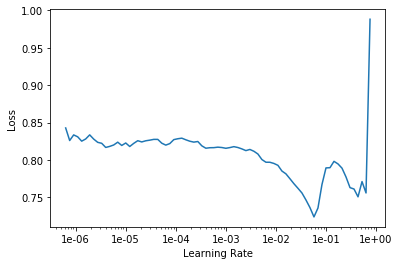

In [92]:
learn.recorder.plot()

In [93]:
learn.fit_one_cycle(1,1e-2, moms=(0.8,0.7)) 

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.522167,0.297974,0.883483,0.954545,0.045455,00:16


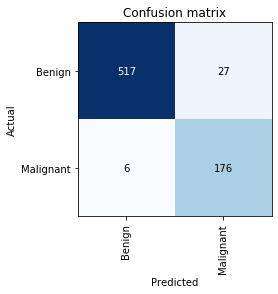

In [94]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [95]:
learn.save('p_all_first-00')

In [96]:
learn.load('p_all_first-00');

In [97]:
learn.freeze_to(-2)

In [98]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


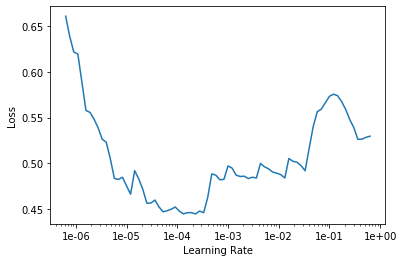

In [99]:
learn.recorder.plot()

In [102]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-5,1e-4), moms=(0.8,0.7)) # first 1e-6,1e-4

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.479990,0.149569,0.897716,0.961433,0.038567,00:18


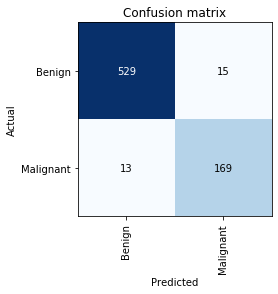

In [103]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [104]:
learn.save('p_all_second_00')

In [105]:
learn.load('p_all_second_00');

In [106]:
learn.freeze_to(-3)

In [107]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


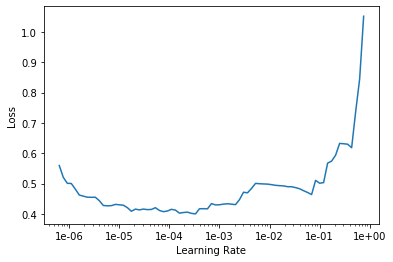

In [108]:
learn.recorder.plot()

In [109]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-6,1e-3), moms=(0.8,0.7)) 

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.385827,0.153029,0.916133,0.968320,0.031680,00:28


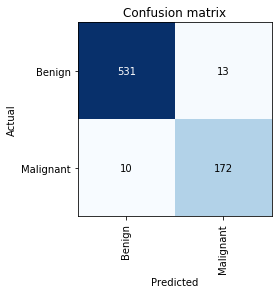

In [110]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [111]:
learn.save('p_all_third_00')

In [112]:
learn.load('p_all_third_00');

In [113]:
learn.unfreeze()

In [114]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


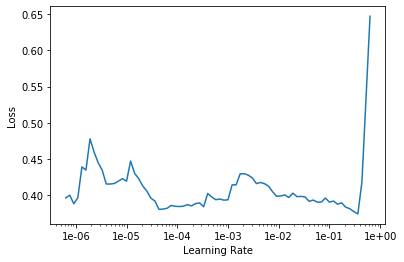

In [115]:
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(5, slice(1e-4,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,error_rate,time
0,0.582995,0.202092,0.855693,0.946281,0.053719,00:35
1,0.610688,0.107605,0.912962,0.966942,0.033058,00:30
2,0.557585,0.258462,0.920502,0.969697,0.030303,00:31
3,0.411642,0.113770,0.930970,0.973829,0.026171,00:35
4,0.381526,0.125060,0.930970,0.973829,0.026171,00:32


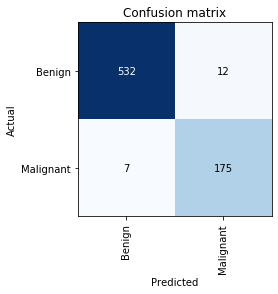

In [117]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [118]:
learn.save('p_all_fourth_00')

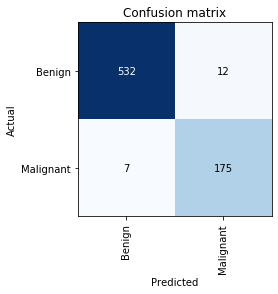

In [119]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [20]:
learn.load('p_all_fourth_00');

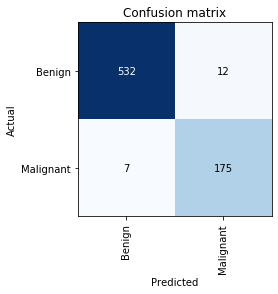

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [120]:
preds, _ = learn.get_preds(ds_type=DatasetType.Valid,ordered=True)

In [121]:
learn.data.classes

['Benign', 'Malignant']

In [122]:
labels = np.argmax(preds, 1)

In [123]:
len(labels)

726

In [124]:
test['labels']=labels

In [125]:
test['Predicted']=[learn.data.classes[int(x)] for x in labels]

In [128]:
test.head()

,Path,Notes,File name,text,labels,Predicted
110,Malignant,NaN,a51bd919c4bf55a48c982026ed8d4f25.txt,Addendum\nMolecular Diagnostics Laboratory Rep...,1,Malignant
1148,Benign,NaN,44fd9c7d8e1c1007246f7852516d6f73.txt,Source of Specimen\nA\tRight breast\nClinical ...,0,Benign
3469,Benign,NaN,96b38d83b430e9893694da86391784f4.txt,Source of Specimen\nA\tLeft breast 2 o'clock m...,0,Benign
3299,Benign,NaN,e64dabb2cf11e725abe12c107ef0660f.txt,Source of Specimen\nA\tRight breast core\nClin...,0,Benign
2187,Benign,NaN,36082d51425b1577bf72993742ae9abf.txt,Source of Specimen\nA\t9-G Cores with Catt\nB\...,0,Benign


In [131]:
((test['Predicted']=='Benign') &(test['Path']=='Benign')).sum()

532

In [130]:
((test['Predicted']=='Malignant') &(test['Path']=='Malignant')).sum()

175

In [132]:
((test['Predicted']=='Malignant') &(test['Path']=='Benign')).sum()

12

In [133]:
((test['Predicted']=='Benign') &(test['Path']=='Malignant')).sum()

7

In [134]:
test[(test['Predicted']=='Malignant') &(test['Path']=='Benign')]

,Path,Notes,File name,text,labels,Predicted
502,Benign,NaN,8fbcc2c5fa22580fdcd7696d2363f25c.txt,Source of Specimen\nA\tLeft breast cores\nB\tR...,1,Malignant
1599,Benign,HRL,899363e903653fadeb372e62fd850cc3.txt,Source of Specimen\nA\t9 G CORE BX LEFT BREAST...,1,Malignant
2623,Benign,NaN,b9e5a2472fcad8e77df065888655ec82.txt,Source of Specimen\nA\tRight 9-G with Calcific...,1,Malignant
2388,Benign,NaN,c948b6cb988d64abb1635760ba6f4b70.txt,Addendum\nMolecular Diagnostics Laboratory Rep...,1,Malignant
43,Benign,NaN,a754029bf8ac1a3a9d33d675fff9cb23.txt,Source of Specimen\nA\tRight Axillary Lymph No...,1,Malignant
3110,Benign,NaN,8c7c85c1d65506d68373c0cf9b0d6a1a.txt,Source of Specimen\nA\tRIGHT BREAST NEEDLE COR...,1,Malignant
3360,Benign,NaN,52b4812b8a5d9d02bbad62c39f734477.txt,Source of Specimen\nA\tBREAST LEFT 6:00\n\nThi...,1,Malignant
3090,Benign,NaN,759644a9a2390412a67f53b2013f5cc3.txt,"Addendum\nDeeper sections of specimen ""C"" repr...",1,Malignant
2429,Benign,HRL,2adaa96df353f6500cf9ca6bb946ef42.txt,Source of Specimen\nA\tRight Sentinel Node #1\...,1,Malignant
2228,Benign,NaN,5316edfedab8fd9bf2c07614a0ffe853.txt,Source of Specimen\nA\tLeft Breast Cyst FNA Cl...,1,Malignant


In [135]:
df1=test[(test['Predicted']=='Malignant') &(test['Path']=='Benign')]

In [136]:
df1.to_csv('misBenign_all_step1.csv')

In [137]:
test[(test['Predicted']=='Benign') &(test['Path']=='Malignant')]

,Path,Notes,File name,text,labels,Predicted
1100,Malignant,NaN,30d7c29afb40105fe4d035b358ef8dc9.txt,"Addendum\nOn immunohistochemistry analysis, pa...",0,Benign
3475,Malignant,NaN,292f2035f7cd9ff7872cb07c0142852e.txt,Source of Specimen\nA\tR breast mass at 6:00\n...,0,Benign
1585,Malignant,NaN,1009b244568b4768f4c04dea70921b00.txt,Source of Specimen\nA\t14 G CORE BX 12:00 LEFT...,0,Benign
3368,Malignant,NaN,a00fd3530877c447a8a53159c27242a9.txt,Addendum\nThis case is presented in the Breast...,0,Benign
634,Malignant,NaN,3572f9db8a6a7d24bb45a5a5cf2e5392.txt,Source of Specimen\nA\tLeft facial lesion\nCli...,0,Benign
2793,Malignant,NaN,05217385eb4679e2fedf2a9c2a904d0c.txt,Addendum\nDeeper sections of right breast skin...,0,Benign
2643,Malignant,NaN,21d07a7c3300b8fc16e17c229e599a2a.txt,Addendum\nImmunohistochemical investigation of...,0,Benign


In [138]:
df2=test[(test['Predicted']=='Benign') &(test['Path']=='Malignant')]

In [139]:
df2.to_csv('misMalignant_all_step1.csv')

# After Doctor review of Misclassification

# Model Exportation

In [20]:
learn.export()

In [60]:
learn.path 

PosixPath('/data2/itahir/MedstarProject')

In [33]:
exportpath=learn.path 

In [34]:
learn_inf = load_learner(exportpath)

In [35]:
learn_inf.predict('/data2/datasets/medstar/breast_pathology/pathology_anonymized_report/ba4ab5b2824d39865b5d81dc259f905f.txt')

(Category Malignant, tensor(1), tensor([0.4708, 0.5292]))

# Production

In [36]:
from fastai import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

In [49]:
from ipywidgets import VBox

In [55]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
btn_upload.data

[b'\nSource of Specimen\nA\tRIGHT BREAST 9 GAUGE\nClinical Information\nAGE female with microcalcifications in the inferomedial aspect of right breast.  Procedure: Stereotactic biopsy.\nGross Description\nThe specimen is submitted in one part.\n\nSpecimen A is received in a single container with formalin and is labeled "right breast 9-gauge, six samples".  It consists of a 2.4 x 1.5 x 0.2 cm aggregation of seven core biopsies of tan pale to yellow soft breast tissue.  The specimen is entirely submitted for microscopy.\n\nA:\tRight breast 9-gauge, six samples, 2 (0)\n\nSurgical Pathology Technologist:  FIRSTNAME LASTNAME\nResident Pathologist:  FIRSTNAME LASTNAME\n\nThis report may contain tests developed by the Molecular Diagnostic Laboratory at Georgetown University Hospital.  These tests have not been approved by the U.S. Food and Drug Administration.  The FDA has determined that such approval is not necessary.  These tests are used for clinical purposes.  This report may also contai

In [39]:
learn_inf.predict(btn_upload.data)

(Category Malignant, tensor(1), tensor([0.4994, 0.5006]))

In [40]:
pred,pred_idx,probs=learn_inf.predict(btn_upload.data)

In [41]:
print(pred),pred_idx.item()

Malignant


(None, 1)

In [42]:
probs[0].item()

0.49939069151878357

In [43]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(btn_upload.data)
out_pl

Output()

In [44]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [45]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Malignant; Probability: 0.5006')

In [56]:
def on_click_classify(change):
    pred,pred_idx,probs = learn_inf.predict(btn_upload.data)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [57]:
btn_upload = widgets.FileUpload()

In [59]:
VBox([widgets.Label('Select the report!'), 
      btn_upload, btn_run, out_pl, lbl_pred])